# Electric Vehicle Charging Data Analysis Report

This report presents data preparation and exploratory data analysis (EDA) of xxxx, focused on xxxxxx.

---

## Table of Contents
1. Introduction
2. Data Loading
3. Data Overview & Initial Insights
4. Data Cleaning
5. Data Transformation
6. Exploratory Data Analysis (EDA)
7. Key Findings / Insights
8. Conclusion & Next Steps

## 1. Introduction

## 2. Data Loading

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import holidays

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
plt.style.use('bmh')
sns.set_theme(style="ticks", palette="muted")

from plotly.colors import qualitative

In [4]:
df = pd.read_csv('ev_charging_patterns.csv')
df_copy = df.copy()

df.head(3)

User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0  User_1        BMW i3              108.463007         Station_391   
1  User_2  Hyundai Kona              100.000000         Station_428   
2  User_3    Chevy Bolt               75.000000         Station_181   

  Charging Station Location  Charging Start Time    Charging End Time  \
0                   Houston  2024-01-01 00:00:00  2024-01-01 00:39:00   
1             San Francisco  2024-01-01 01:00:00  2024-01-01 03:01:00   
2             San Francisco  2024-01-01 02:00:00  2024-01-01 04:48:00   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
0              60.712346                   0.591363           36.389181   
1              12.339275                   3.133652           30.677735   
2              19.128876                   2.452653           27.513593   

   Charging Cost (USD) Time of Day Day of Week  State of Charge (Start %)  \
0            13.087717     Evening     Tuesday                  29.371576   
1            21.128448     Morning      Monday                  10.115778   
2            35.667270     Morning    Thursday                   6.854604   

   State of Charge (End %)  Distance Driven (since last charge) (km)  \
0                86.119962                                293.602111   
1                84.664344                                112.112804   
2                69.917615                                 71.799253   

   Temperature (°C)  Vehicle Age (years)     Charger Type      User Type  
0         27.947953                  2.0  DC Fast Charger       Commuter  
1         14.311026                  3.0          Level 1  Casual Driver  
2         21.002002                  2.0          Level 2       Commuter

## 3. Data Overview & Initial Insights

This section provides an initial assessment of the dataset structure, data types, and potential data quality issues.  
The goal is to identify aspects that may require data cleaning or transformation before proceeding to exploratory analysis.

The dataset contains **1 320 rows** and **20 columns**, with **10 categorical (object)** and **10 numerical** variables.  
For **three columns**, the number of non-null entries equals **1 254**, which indicates missing values that will need to be addressed in the data preparation stage.

The columns **`Charging Start Time`** and **`Charging End Time`** are currently stored as *object* types but should be converted to *datetime* to enable temporal analysis.

Additionally, some values in **`State of Charge (Start %)`** and **`State of Charge (End %)`** exceed 100%. Such observations are physically implausible and may represent data entry errors or measurement inconsistencies.

These initial findings are based on the results of the `df.info()` and `df.describe()` functions.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [6]:
df.describe()

Battery Capacity (kWh)  Energy Consumed (kWh)  \
count             1320.000000            1254.000000   
mean                74.534692              42.642894   
std                 20.626914              22.411705   
min                  1.532807               0.045772   
25%                 62.000000              23.881193   
50%                 75.000000              42.691405   
75%                 85.000000              61.206218   
max                193.003074             152.238758   

       Charging Duration (hours)  Charging Rate (kW)  Charging Cost (USD)  \
count                1320.000000         1254.000000          1320.000000   
mean                    2.269377           25.963003            22.551352   
std                     1.061037           14.011326            10.751494   
min                     0.095314            1.472549             0.234317   
25%                     1.397623           13.856583            13.368141   
50%                     2.258136           25.603799            22.076360   
75%                     3.112806           37.502998            31.646044   
max                     7.635145           97.342255            69.407743   

       State of Charge (Start %)  State of Charge (End %)  \
count                1320.000000              1320.000000   
mean                   49.130012                75.141590   
std                    24.074134                17.080580   
min                     2.325959                 7.604224   
25%                    27.786903                62.053266   
50%                    48.241771                75.682496   
75%                    69.277921                88.201370   
max                   152.489761               177.708666   

       Distance Driven (since last charge) (km)  Temperature (°C)  \
count                               1254.000000       1320.000000   
mean                                 153.596788         15.263591   
std                                   86.004987         14.831216   
min                                    0.862361        -10.724770   
25%                                   79.445335          2.800664   
50%                                  152.259867         14.630846   
75%                                  226.073284         27.981810   
max                                  398.364775         73.169588   

       Vehicle Age (years)  
count          1320.000000  
mean              3.612843  
std               2.309824  
min               0.000000  
25%               2.000000  
50%               4.000000  
75%               6.000000  
max              11.688592

## 4. Data Cleaning

To ensure data integrity, duplicate rows were checked and none were found.

For the purpose of aggregation, grouping, and further analysis, all categorical columns were verified for data consistency. No inconsistent spellings, capitalization issues, or similar irregularities were detected.

For the columns **`User ID`** and **`Charging Station ID`**, prefixes were removed and data types were converted to numeric to enable efficient aggregation and analysis.

The columns **`Charging Start Time`** and **`Charging End Time`** were converted from *object* to *datetime* format to support time-based computations and visualizations.


In [7]:
duplicate_rows = df.duplicated().sum()
print (f"Number of duplicated rows: {duplicate_rows}")

Number of duplicated rows: 0


In [8]:
df['User ID'] = df['User ID'].str.removeprefix('User_').astype(int)
df['Charging Station ID'] = df['Charging Station ID'].str.removeprefix('Station_').astype(int)

In [9]:
print (f"'User ID' dtype: {df['User ID'].dtype}")
print (f"'Charging Station ID' dtype: {df['Charging Station ID'].dtype}")

'User ID' dtype: int32
'Charging Station ID' dtype: int32


In [10]:
df['Vehicle Model'].value_counts()

Tesla Model 3    280
Hyundai Kona     266
Nissan Leaf      260
BMW i3           258
Chevy Bolt       256
Name: Vehicle Model, dtype: int64

In [11]:
df['Charging Station Location'].value_counts()

Los Angeles      297
San Francisco    264
Houston          262
New York         255
Chicago          242
Name: Charging Station Location, dtype: int64

In [12]:
df['Time of Day'].value_counts()

Evening      362
Morning      336
Night        312
Afternoon    310
Name: Time of Day, dtype: int64

In [13]:
df['Day of Week'].value_counts()

Saturday     205
Tuesday      200
Wednesday    197
Sunday       191
Friday       188
Monday       185
Thursday     154
Name: Day of Week, dtype: int64

In [14]:
df['Charger Type'].value_counts()

Level 1            459
Level 2            431
DC Fast Charger    430
Name: Charger Type, dtype: int64

In [15]:
df['User Type'].value_counts()

Commuter                  476
Long-Distance Traveler    437
Casual Driver             407
Name: User Type, dtype: int64

In [16]:
df[['Charging Start Time', 'Charging End Time']] = df[['Charging Start Time', 'Charging End Time']].apply(pd.to_datetime)

In [17]:
print (f"'Charging Start Time' dtype: {df['Charging Start Time'].dtype}")
print (f"'Charging End Time' dtype: {df['Charging End Time'].dtype}")

'Charging Start Time' dtype: datetime64[ns]
'Charging End Time' dtype: datetime64[ns]


Missing values were detected in columns: **`Energy Consumed (kWh)`**, **`Charging Rate (kW)`** and **`Distance Driven (since last charge) (km)`**. There are no rows where all three values are missing.

An analysis was conducted to check whether NaN values appear at the same indices across these columns. No consistent pattern was found, even though the number of missing entries is the same.

Physically, **`Energy Consumed (kWh)`** and **`Charging Rate (kW)`** are related by the formula:

$$
\text{Energy Consumed (kWh)} = \text{Charging Rate (kW)} \times \text{Charging Duration (hours)}
$$

However, in this dataset, the relationship is not direct due to energy losses, rounding, and measurement differences. `Distance Driven` also shows no clear dependency on other available metrics.

Therefore, a statistical approach was applied: missing values in all three columns were imputed using the median of existing data. This ensures consistent and realistic imputation without introducing extreme or unrealistic values.

In [18]:
df.isna().sum()

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

In [19]:
mask_nan_pattern =  (
    (df['Energy Consumed (kWh)'].isna() == df['Charging Rate (kW)'].isna()) 
    & (df['Energy Consumed (kWh)'].isna() == df['Distance Driven (since last charge) (km)'].isna())
)
mask_nan_pattern.all()

False

In [20]:
mask_nan_rows = df[['Energy Consumed (kWh)', 
                   'Charging Rate (kW)', 
                   'Distance Driven (since last charge) (km)']].isna().all(axis=1)

df[mask_nan_rows].head(3)

Empty DataFrame
Columns: [User ID, Vehicle Model, Battery Capacity (kWh), Charging Station ID, Charging Station Location, Charging Start Time, Charging End Time, Energy Consumed (kWh), Charging Duration (hours), Charging Rate (kW), Charging Cost (USD), Time of Day, Day of Week, State of Charge (Start %), State of Charge (End %), Distance Driven (since last charge) (km), Temperature (°C), Vehicle Age (years), Charger Type, User Type]
Index: []

In [21]:
df[['Energy Consumed (kWh)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)']].describe()

Energy Consumed (kWh)  Charging Rate (kW)  \
count            1254.000000         1254.000000   
mean               42.642894           25.963003   
std                22.411705           14.011326   
min                 0.045772            1.472549   
25%                23.881193           13.856583   
50%                42.691405           25.603799   
75%                61.206218           37.502998   
max               152.238758           97.342255   

       Distance Driven (since last charge) (km)  
count                               1254.000000  
mean                                 153.596788  
std                                   86.004987  
min                                    0.862361  
25%                                   79.445335  
50%                                  152.259867  
75%                                  226.073284  
max                                  398.364775

In [22]:
df[df['Energy Consumed (kWh)'].isna()].tail(3)

User ID  Vehicle Model  Battery Capacity (kWh)  Charging Station ID  \
1270     1271  Tesla Model 3                75.00000                  302   
1271     1272    Nissan Leaf                75.00000                  334   
1303     1304   Hyundai Kona                81.06203                  103   

     Charging Station Location Charging Start Time   Charging End Time  \
1270                   Houston 2024-02-22 22:00:00 2024-02-23 01:06:00   
1271                  New York 2024-02-22 23:00:00 2024-02-23 02:27:00   
1303                   Houston 2024-02-24 07:00:00 2024-02-24 10:41:00   

      Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
1270                    NaN                   0.548378           37.246496   
1271                    NaN                   2.337807           36.932242   
1303                    NaN                   1.695958           13.487242   

      Charging Cost (USD) Time of Day Day of Week  State of Charge (Start %)  \
1270            15.367365     Evening      Monday                  19.890941   
1271            25.857018     Morning    Thursday                  74.553612   
1303            14.317812     Morning      Friday                  83.091207   

      State of Charge (End %)  Distance Driven (since last charge) (km)  \
1270                62.232234                                 49.122660   
1271                83.232036                                 56.902262   
1303                76.501221                                 11.256662   

      Temperature (°C)  Vehicle Age (years) Charger Type  \
1270         -2.462734                  4.0      Level 2   
1271         37.492518                  7.0      Level 1   
1303         13.737856                  5.0      Level 1   

                   User Type  
1270                Commuter  
1271  Long-Distance Traveler  
1303  Long-Distance Traveler

In [23]:
df[df['Charging Rate (kW)'].isna()].tail(3)

User ID  Vehicle Model  Battery Capacity (kWh)  Charging Station ID  \
1261     1262  Tesla Model 3               75.000000                  310   
1277     1278   Hyundai Kona               75.000000                  232   
1284     1285   Hyundai Kona               63.990544                   77   

     Charging Station Location Charging Start Time   Charging End Time  \
1261                   Chicago 2024-02-22 13:00:00 2024-02-22 14:58:00   
1277               Los Angeles 2024-02-23 05:00:00 2024-02-23 07:19:00   
1284               Los Angeles 2024-02-23 12:00:00 2024-02-23 14:57:00   

      Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
1261              25.527547                   0.434890                 NaN   
1277              27.997205                   1.768621                 NaN   
1284              30.987567                   1.932806                 NaN   

      Charging Cost (USD) Time of Day Day of Week  State of Charge (Start %)  \
1261            25.021182   Afternoon      Sunday                  20.065397   
1277            25.537205     Evening   Wednesday                  59.660627   
1284            35.732028     Evening    Saturday                  73.307240   

      State of Charge (End %)  Distance Driven (since last charge) (km)  \
1261                80.320747                                265.238349   
1277                95.054221                                212.708285   
1284                76.174642                                203.060254   

      Temperature (°C)  Vehicle Age (years)     Charger Type User Type  
1261         18.996540                  4.0          Level 1  Commuter  
1277         -6.855073                  0.0  DC Fast Charger  Commuter  
1284         28.353833                  5.0  DC Fast Charger  Commuter

In [24]:
df_valid = df.dropna(subset=['Energy Consumed (kWh)', 'Charging Rate (kW)', 'Charging Duration (hours)']).copy()
df_valid['ratio'] = df_valid['Energy Consumed (kWh)'] / (df_valid['Charging Rate (kW)'] * df_valid['Charging Duration (hours)'])

df_valid['ratio'].describe()

count    1191.000000
mean        1.647476
std         2.801957
min         0.001826
25%         0.387700
50%         0.798448
75%         1.777864
max        35.381316
Name: ratio, dtype: float64

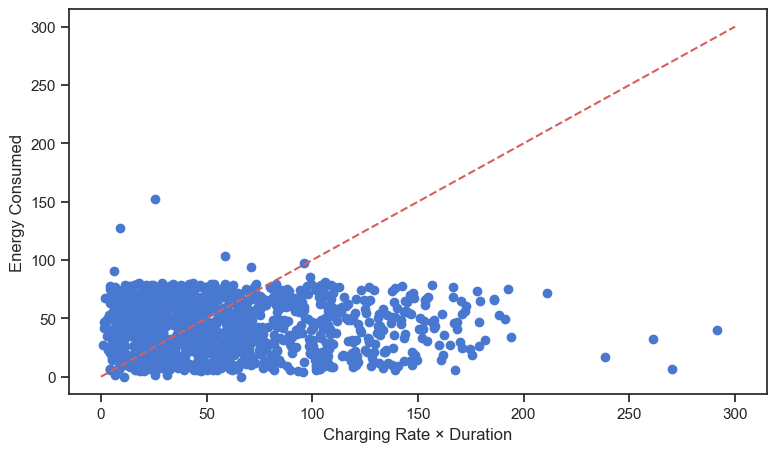

In [25]:
plt.figure(figsize=(9,5))
plt.scatter(x = df_valid['Charging Rate (kW)'] * df_valid['Charging Duration (hours)'], y = df_valid['Energy Consumed (kWh)'])
plt.xlabel('Charging Rate × Duration')
plt.ylabel('Energy Consumed')
plt.plot([0, 300],[0,300], 'r--')
plt.show()

In [26]:
df['Energy Consumed (kWh)'].fillna(df['Energy Consumed (kWh)'].median(), inplace = True)
df['Charging Rate (kW)'].fillna(df['Charging Rate (kW)'].median(), inplace = True)

In [27]:
if df['Energy Consumed (kWh)'].isna().any():
    display(df[df['Energy Consumed (kWh)']].isna().head(3))
else:
    print ("'Energy Consumed (kWh)' NaN: 0")

'Energy Consumed (kWh)' NaN: 0


In [28]:
if df['Charging Rate (kW)'].isna().any():
    display(df[df['Charging Rate (kW)']].isna().head(3))
else:
    print ("'Charging Rate (kW)' NaN: 0")

'Charging Rate (kW)' NaN: 0


In [29]:
df[df['Distance Driven (since last charge) (km)'].isna()].head(3)

User ID Vehicle Model  Battery Capacity (kWh)  Charging Station ID  \
28       29        BMW i3               75.000000                  129   
30       31    Chevy Bolt              100.000000                  239   
95       96    Chevy Bolt               24.599922                   10   

   Charging Station Location Charging Start Time   Charging End Time  \
28               Los Angeles 2024-01-02 04:00:00 2024-01-02 04:35:00   
30                  New York 2024-01-02 06:00:00 2024-01-02 09:54:00   
95                   Chicago 2024-01-04 23:00:00 2024-01-05 00:43:00   

    Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
28              31.684485                   2.439678           48.648723   
30              19.473801                   1.435533            7.043936   
95              42.691405                   1.382498           32.436549   

    Charging Cost (USD) Time of Day Day of Week  State of Charge (Start %)  \
28            25.617104   Afternoon      Friday                  34.727639   
30            36.945273   Afternoon   Wednesday                  31.320787   
95            38.058022       Night     Tuesday                  48.327354   

    State of Charge (End %)  Distance Driven (since last charge) (km)  \
28                54.402050                                       NaN   
30                78.056653                                       NaN   
95                85.067422                                       NaN   

    Temperature (°C)  Vehicle Age (years)     Charger Type      User Type  
28         20.378562                  3.0          Level 2  Casual Driver  
30          8.352906                  2.0  DC Fast Charger  Casual Driver  
95         23.398468                  5.0          Level 1  Casual Driver

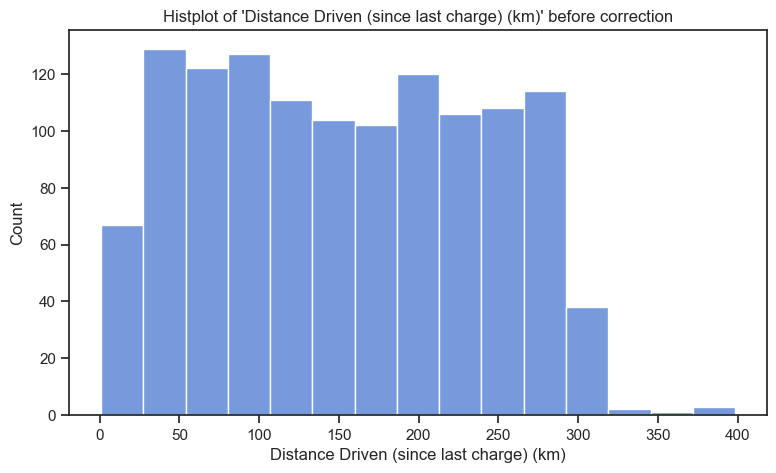

In [30]:
plt.figure(figsize=(9,5))
sns.histplot(df['Distance Driven (since last charge) (km)'])
plt.title("Histplot of 'Distance Driven (since last charge) (km)' before correction")
plt.show()

In [31]:
df['Distance Driven (since last charge) (km)'].fillna(df['Distance Driven (since last charge) (km)'].median(), inplace = True)

In [32]:
if df['Distance Driven (since last charge) (km)'].isna().any():
    display(df[df['Distance Driven (since last charge) (km)']].isna().head(3))
else:
    print ("'Distance Driven (since last charge) (km)' NaN: 0")

'Distance Driven (since last charge) (km)' NaN: 0


The potential outliers were identified through histograms, box plots, and direct data inspection. Six columns were examined in detail: 
**`'Battery Capacity (kWh)'`**, **`'Energy Consumed (kWh)'`**, **`Charging Duration (hours)`**, **`State of Charge (Start %)`**, **`State of Charge (End %)`** and **`Temperature (°C)`**.


**Battery Capacity:**

- The original dataset contains the values for **`'Battery Capacity (kWh)'`** ranging from about 1.5 kWh to 193 kWh. For the given vehicle models (Tesla Model 3, Hyundai Kona, Nissan Leaf, BMW i3, Chevy Bolt), realistic battery sizes range from about 18.8 kWh to 82 kWh.
- OEM battery capacities with the estimation of degradation at 1.5% per year were calculated as a separate column. 
- To ensure physical plausibility, only records within 15–130 kWh were retained. Values below 15 kWh are too low for any BEV, while values above 130 kWh exceed even the largest EV batteries available.

**Consumed Energy:** 

- After introducing OEM battery capacities with an estimated degradation of 1.5% per year, approximately 29% of records violate the physical condition that consumed energy should not exceed battery capacity plus an allowance for charging losses (10%). These records were flagged.
- Additionally, records where consumed energy exceeded the maximum battery capacity (including the 10% charging loss allowance) were dropped.

**Charging Duration:**

- Real-world DC Fast Chargers typically charge batteries in less than 1 hour.
- About 28% of records were flagged as physically unrealistic due to excessive charging durations.
- The nearly identical proportion of flagged records for both energy and charging time further indicates the dataset is synthetic.

**State of Charge:**

- State of Charge (SoC) indicates how much charge a battery has at any given moment — as a percentage of its total usable capacity (0% = discharged, 100% = fully charged). During the charging process, the ending SoC should always be higher than the starting SoC. Based on this, rows with a higher starting value were identified and swapped with the ending value.
-  Values above 100% may result from calibration errors in the SoC sensor. They were corrected to 100%.

**Temperature:**

- Ambient temperature readings were inconsistent with winter conditions in the United States (Los Angeles, San Francisco, Houston, New York and Chicago) likely due to units recorded in Fahrenheit.
- Values were converted to Celsius to correct this.

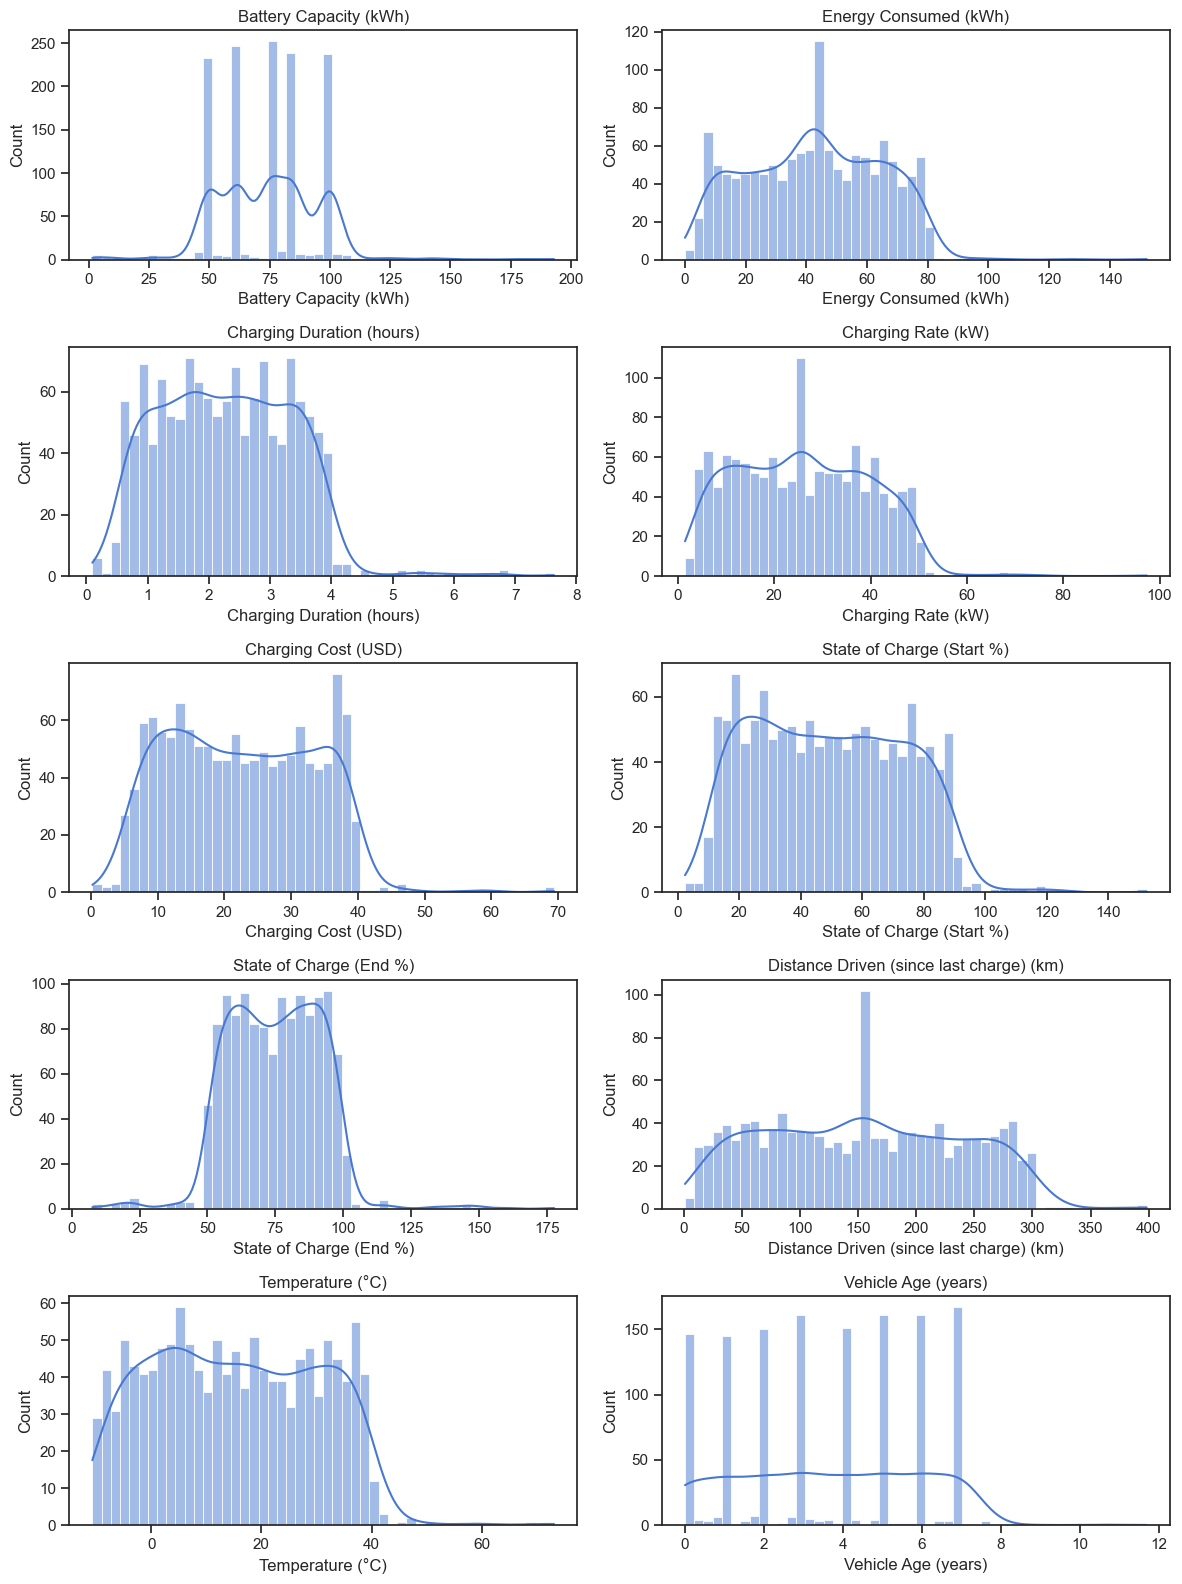

In [33]:
numeric_columns = ['Battery Capacity (kWh)', 'Energy Consumed (kWh)', 
                   'Charging Duration (hours)', 'Charging Rate (kW)', 
                   'Charging Cost (USD)', 'State of Charge (Start %)', 'State of Charge (End %)',
                   'Distance Driven (since last charge) (km)', 'Temperature (°C)', 'Vehicle Age (years)']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,16))
axes = axes.flatten()

for i, col in enumerate(numeric_columns[:len(axes)]):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

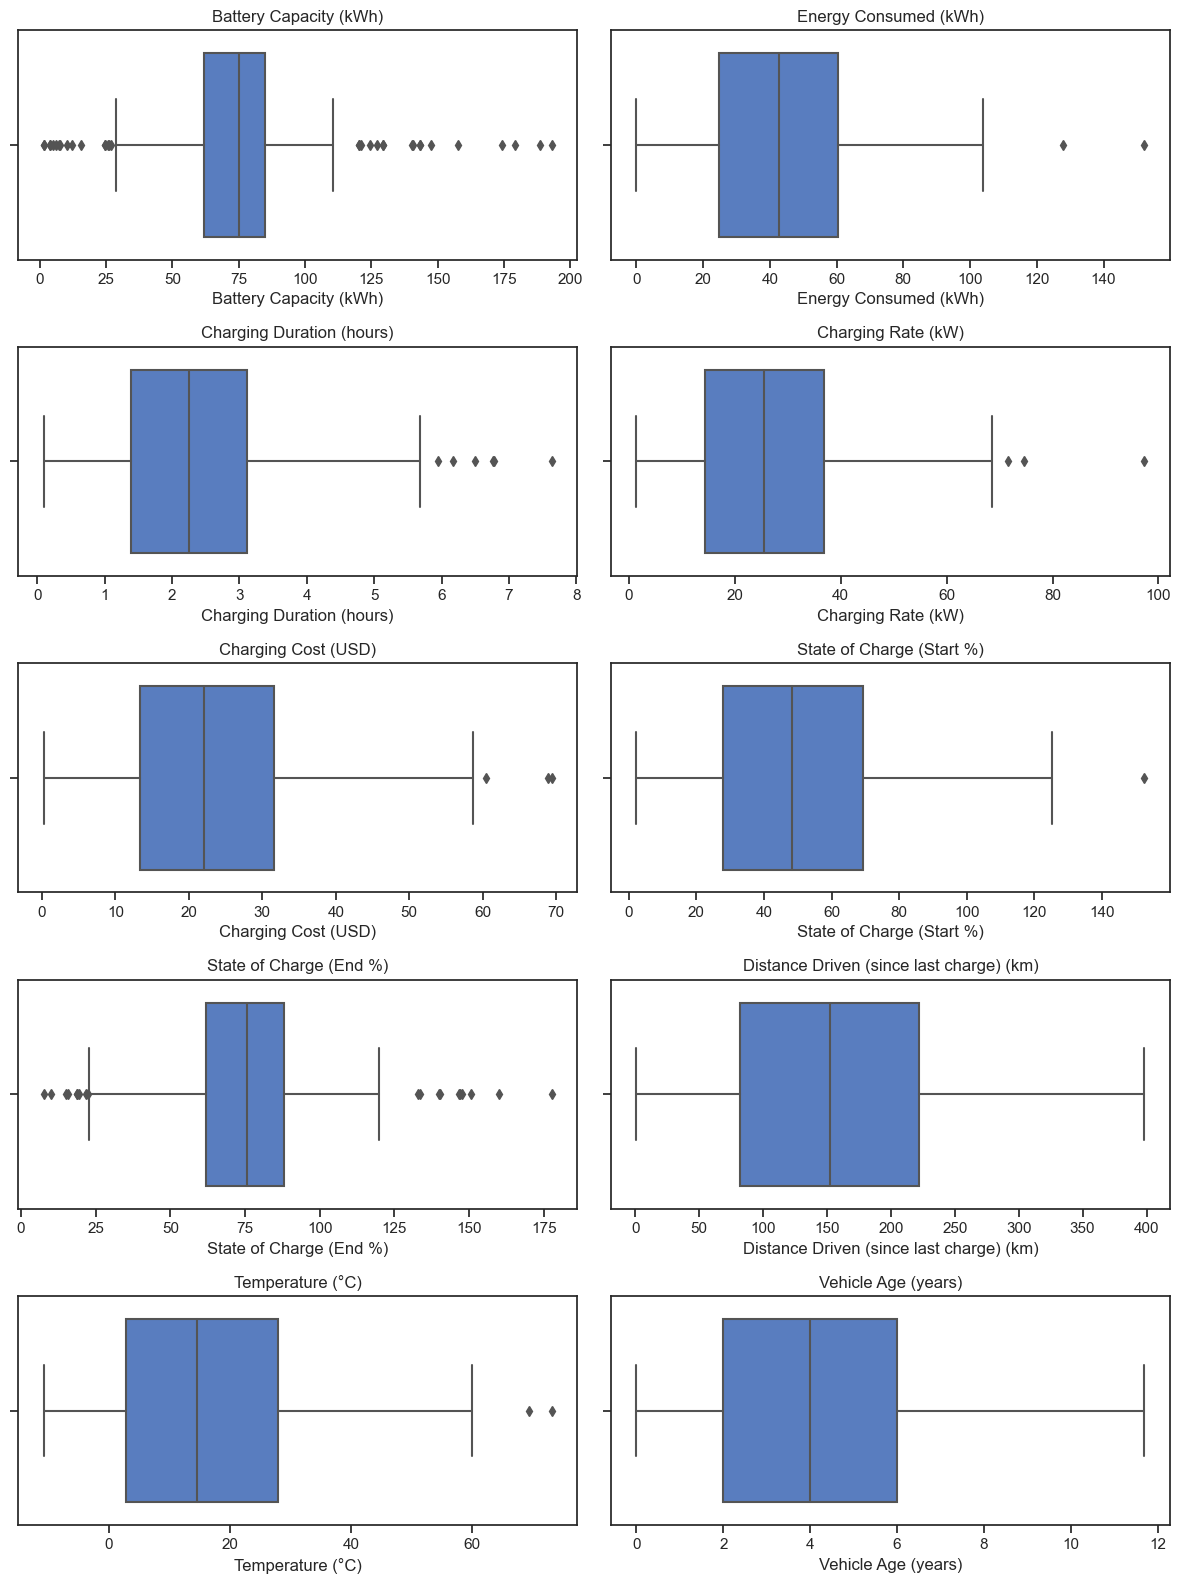

In [34]:
numeric_columns = ['Battery Capacity (kWh)', 'Energy Consumed (kWh)', 
                   'Charging Duration (hours)', 'Charging Rate (kW)', 
                   'Charging Cost (USD)', 'State of Charge (Start %)', 'State of Charge (End %)',
                   'Distance Driven (since last charge) (km)', 'Temperature (°C)', 'Vehicle Age (years)']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,16))
axes = axes.flatten()

for i, col in enumerate(numeric_columns[:len(axes)]):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

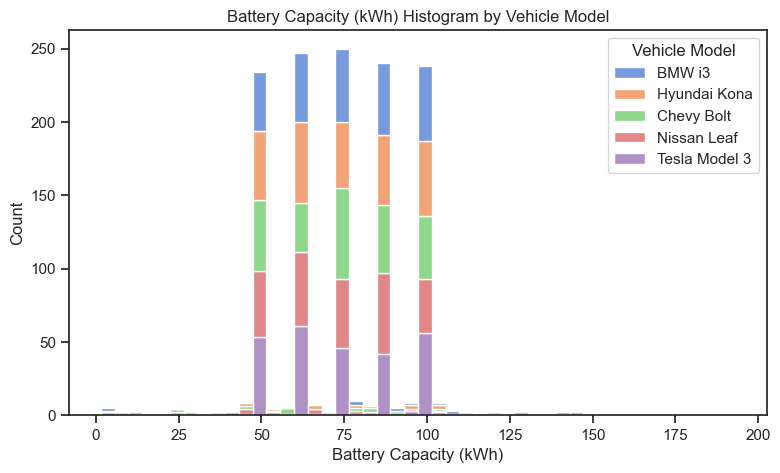

In [35]:
plt.figure(figsize=(9,5))
sns.histplot(data = df, x = 'Battery Capacity (kWh)', hue = 'Vehicle Model', multiple = 'stack')
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Count")
plt.title("Battery Capacity (kWh) Histogram by Vehicle Model")
plt.show()

In [36]:
df['Battery Capacity (kWh)'].describe(percentiles=[0.01, 0.05, 0.95, 0.99])

count    1320.000000
mean       74.534692
std        20.626914
min         1.532807
1%         25.680359
5%         50.000000
50%        75.000000
95%       100.000000
99%       123.726148
max       193.003074
Name: Battery Capacity (kWh), dtype: float64

In [37]:
manufacture_capa = {
    'Tesla Model 3': (50, 82),
    'Hyundai Kona': (39.2, 64.8),
    'Nissan Leaf': (24, 62),
    'BMW i3': (18.8, 42.2),
    'Chevy Bolt': (60, 65)
}

degradation_rate = 0.015

df['Battery Capacity Min (kWh)'] = df['Vehicle Model'].map(lambda x: manufacture_capa.get(x, (0,0))[0])
df['Battery Capacity Max (kWh)'] = df['Vehicle Model'].map(lambda x: manufacture_capa.get(x, (0,0))[1])

df['Battery Capacity with Degradation Min (kWh)'] = df['Battery Capacity Min (kWh)'] * (1 - degradation_rate) ** df['Vehicle Age (years)']
df['Battery Capacity with Degradation Max (kWh)'] = df['Battery Capacity Max (kWh)'] * (1 - degradation_rate) ** df['Vehicle Age (years)']


max_age = df['Vehicle Age (years)'].max()
age_norm = df['Vehicle Age (years)'].clip(0, max_age) / max_age


df['Updated Battery Capacity (kWh)'] = (
    df['Battery Capacity with Degradation Min (kWh)'] * (1 - age_norm) +
    df['Battery Capacity with Degradation Max (kWh)'] * age_norm
)

In [38]:
df.drop(columns=['Battery Capacity Min (kWh)', 'Battery Capacity Max (kWh)'] , inplace = True)

In [39]:
print (f"Dataframe shape before correction: {df.shape}")

df = df[(df['Battery Capacity (kWh)']>=15) & (df['Battery Capacity (kWh)']<=130)]

print (f"Dataframe shape after correction: {df.shape}")

Dataframe shape before correction: (1320, 23)
Dataframe shape after correction: (1300, 23)


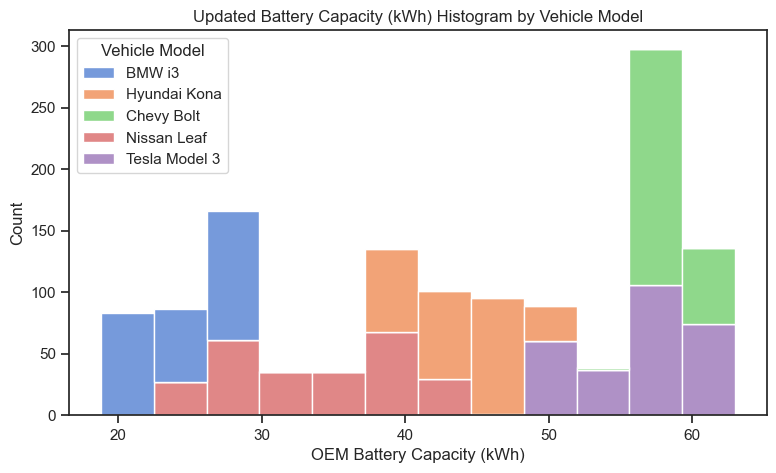

In [40]:
plt.figure(figsize=(9,5))
sns.histplot(data = df, x = 'Updated Battery Capacity (kWh)', hue = 'Vehicle Model', multiple = 'stack')
plt.xlabel("OEM Battery Capacity (kWh)")
plt.ylabel("Count")
plt.title("Updated Battery Capacity (kWh) Histogram by Vehicle Model")
plt.show()

In [41]:
df['Is Energy Valid?'] = np.where(df['Updated Battery Capacity (kWh)'] * 1.1 >= df['Energy Consumed (kWh)'], 'Yes', 'No')

In [42]:
df['Is Energy Valid?'].value_counts(normalize = True) * 100

Yes    58.230769
No     41.769231
Name: Is Energy Valid?, dtype: float64

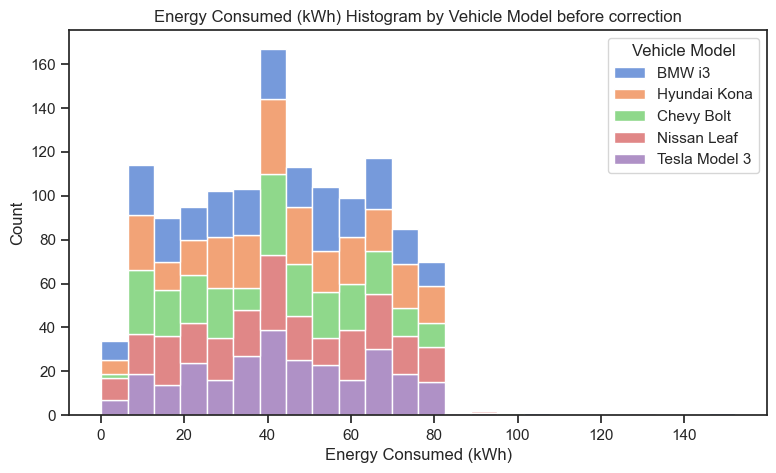

In [43]:
plt.figure(figsize=(9,5))
sns.histplot(data = df, x = 'Energy Consumed (kWh)', hue = 'Vehicle Model', multiple = 'stack')
plt.xlabel("Energy Consumed (kWh)")
plt.ylabel("Count")
plt.title("Energy Consumed (kWh) Histogram by Vehicle Model before correction")
plt.show()

In [44]:
df['Energy Consumed (kWh)'].describe(percentiles=[0.95, 0.99])

count    1300.000000
mean       42.648093
std        21.887599
min         0.045772
50%        42.691405
95%        76.577805
99%        79.788078
max       152.238758
Name: Energy Consumed (kWh), dtype: float64

In [45]:
print (f"Dataframe shape before correction: {df.shape}")

df = df[(df['Energy Consumed (kWh)']<=143)]

print (f"Dataframe shape after correction: {df.shape}")

Dataframe shape before correction: (1300, 24)
Dataframe shape after correction: (1299, 24)


In [47]:
dc_pot_outlier = len(df[((df['Charging Duration (hours)']>=1) & (df['Charger Type']=='DC Fast Charger'))])

print (f"DC Fast Charger potential outlier count: {dc_pot_outlier}")

DC Fast Charger potential outlier count: 365


In [48]:
df['Is DC Fast Valid?'] = np.where(
    (df['Charger Type'] != 'DC Fast Charger') | (df['Charging Duration (hours)'] <= 1),
    'Yes',
    'No'
)

In [49]:
df['Is DC Fast Valid?'].value_counts(normalize = True) * 100

Yes    71.901463
No     28.098537
Name: Is DC Fast Valid?, dtype: float64

In [50]:
print (f"'State of Charge (Start %)' above 100% count before correction: {len(df[df['State of Charge (Start %)']>100])}")
print (f"'State of Charge (End %)' above 100% count before correction: {len(df[df['State of Charge (End %)']>100])}")

'State of Charge (Start %)' above 100% count before correction: 9
'State of Charge (End %)' above 100% count before correction: 23


In [51]:
df[df['State of Charge (Start %)']>100].head(3)

User ID  Vehicle Model  Battery Capacity (kWh)  Charging Station ID  \
88        89         BMW i3                    85.0                    1   
191      192   Hyundai Kona                   100.0                   45   
282      283  Tesla Model 3                    50.0                  334   

    Charging Station Location Charging Start Time   Charging End Time  \
88                Los Angeles 2024-01-04 16:00:00 2024-01-04 17:56:00   
191               Los Angeles 2024-01-08 23:00:00 2024-01-09 00:03:00   
282                  New York 2024-01-12 18:00:00 2024-01-12 20:46:00   

     Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
88               33.072950                   1.469660           30.344748   
191              55.188774                   1.414506           25.603799   
282              20.353546                   2.424679           11.161935   

     Charging Cost (USD) Time of Day Day of Week  State of Charge (Start %)  \
88             15.550838     Evening   Wednesday                 105.032224   
191            23.683410     Morning   Wednesday                 152.489761   
282            26.165414   Afternoon    Thursday                 109.265794   

     State of Charge (End %)  Distance Driven (since last charge) (km)  \
88                 83.023473                                164.682892   
191                68.128812                                249.049414   
282                82.333834                                116.184082   

     Temperature (°C)  Vehicle Age (years) Charger Type  \
88          -6.514432                  1.0      Level 2   
191         30.699279                  0.0      Level 1   
282          2.770322                  1.0      Level 2   

                  User Type  Battery Capacity with Degradation Min (kWh)  \
88   Long-Distance Traveler                                       18.518   
191                Commuter                                       39.200   
282                Commuter                                       49.250   

     Battery Capacity with Degradation Max (kWh)  \
88                                        41.567   
191                                       64.800   
282                                       80.770   

     Updated Battery Capacity (kWh) Is Energy Valid? Is DC Fast Valid?  
88                        20.489923               No               Yes  
191                       39.200000               No               Yes  
282                       51.946646              Yes               Yes

In [52]:
df[df['State of Charge (End %)']>100].head(3)

User ID Vehicle Model  Battery Capacity (kWh)  Charging Station ID  \
19        20        BMW i3                    50.0                  125   
44        45   Nissan Leaf                    75.0                   44   
125      126        BMW i3                    85.0                  187   

    Charging Station Location Charging Start Time   Charging End Time  \
19                Los Angeles 2024-01-01 19:00:00 2024-01-01 20:22:00   
44                Los Angeles 2024-01-02 20:00:00 2024-01-02 22:29:00   
125                  New York 2024-01-06 05:00:00 2024-01-06 06:29:00   

     Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
19               48.482484                   2.580925           45.291435   
44               42.691405                   3.296057            5.114613   
125               6.189016                   1.291855           19.715350   

     Charging Cost (USD) Time of Day Day of Week  State of Charge (Start %)  \
19              7.090844     Morning   Wednesday                  12.754878   
44             30.037969     Morning   Wednesday                  15.220939   
125            20.863113   Afternoon      Friday                  34.600222   

     State of Charge (End %)  Distance Driven (since last charge) (km)  \
19                116.095657                                243.255769   
44                132.952011                                 49.384266   
125               101.676099                                275.741904   

     Temperature (°C)  Vehicle Age (years) Charger Type  \
19           9.202410             3.000000      Level 2   
44          32.014577             3.680053      Level 2   
125          5.727356             1.000000      Level 1   

                  User Type  Battery Capacity with Degradation Min (kWh)  \
19   Long-Distance Traveler                                    17.966627   
44   Long-Distance Traveler                                    22.701587   
125           Casual Driver                                    18.518000   

     Battery Capacity with Degradation Max (kWh)  \
19                                     40.329343   
44                                     58.645767   
125                                    41.567000   

     Updated Battery Capacity (kWh) Is Energy Valid? Is DC Fast Valid?  
19                        23.706252               No               Yes  
44                        34.018303               No               Yes  
125                       20.489923              Yes               Yes

In [53]:
soc_mask = df['State of Charge (Start %)'] > df['State of Charge (End %)']

df.loc[soc_mask, ['State of Charge (Start %)', 'State of Charge (End %)']] = \
    df.loc[soc_mask, ['State of Charge (End %)', 'State of Charge (Start %)']].values

df['State of Charge (Start %)'] = df['State of Charge (Start %)'].clip(upper=100)
df['State of Charge (End %)'] = df['State of Charge (End %)'].clip(upper=100)

In [54]:
print (f"'State of Charge (Start %)' above 100% count after correction: {len(df[df['State of Charge (Start %)']>100])}")
print (f"'State of Charge (End %)' above 100% count after correction: {len(df[df['State of Charge (End %)']>100])}")

'State of Charge (Start %)' above 100% count after correction: 0
'State of Charge (End %)' above 100% count after correction: 0


In [55]:
df[df['Battery Capacity (kWh)'] < df['Energy Consumed (kWh)']].head(3)

User ID Vehicle Model  Battery Capacity (kWh)  Charging Station ID  \
3         4  Hyundai Kona                    50.0                  327   
9        10  Hyundai Kona                    50.0                  452   
20       21   Nissan Leaf                    50.0                   81   

   Charging Station Location Charging Start Time   Charging End Time  \
3                    Houston 2024-01-01 03:00:00 2024-01-01 06:42:00   
9                    Chicago 2024-01-01 09:00:00 2024-01-01 12:44:00   
20               Los Angeles 2024-01-01 20:00:00 2024-01-01 22:54:00   

    Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
3               79.457824                   1.266431            32.88287   
9               78.868607                   2.026875            11.76100   
20              50.279067                   3.168873            30.48996   

    Charging Cost (USD) Time of Day Day of Week  State of Charge (Start %)  \
3             13.036239     Evening    Saturday                  83.120003   
9             21.312302     Morning   Wednesday                  27.399455   
20            28.872895       Night     Tuesday                  16.545512   

    State of Charge (End %)  Distance Driven (since last charge) (km)  \
3                 99.624328                                199.577785   
9                 70.053381                                 54.006309   
20                77.936327                                 15.420445   

    Temperature (°C)  Vehicle Age (years)     Charger Type  \
3          38.316313             1.000000          Level 1   
9          27.512019             2.830381  DC Fast Charger   
20         33.980310             3.000000          Level 2   

                 User Type  Battery Capacity with Degradation Min (kWh)  \
3   Long-Distance Traveler                                    38.612000   
9                 Commuter                                    37.558488   
20           Casual Driver                                    22.936119   

    Battery Capacity with Degradation Max (kWh)  \
3                                     63.828000   
9                                     62.086480   
20                                    59.251641   

    Updated Battery Capacity (kWh) Is Energy Valid? Is DC Fast Valid?  
3                        40.769317               No               Yes  
9                        43.497917               No                No  
20                       32.256879               No               Yes

In [56]:
df[['Charging Start Time', 'Charging End Time', 'Temperature (°C)']].agg(['min', 'max'])

Charging Start Time   Charging End Time  Temperature (°C)
min 2024-01-01 00:00:00 2024-01-01 00:39:00        -10.659680
max 2024-02-24 23:00:00 2024-02-24 23:56:00         73.169588

In [57]:
print(f"'Temperature (°C)' above 45°C count: {len(df[df['Temperature (°C)']>45])}")

'Temperature (°C)' above 45°C count: 7


In [58]:
print (f"'Temperature (°C)' median: {df['Temperature (°C)'].median():.2f}")

'Temperature (°C)' median: 14.73


In [59]:
df['Temperature (°C)'] = (df['Temperature (°C)'] - 32) * 5/9 # Fahrenheit conversion

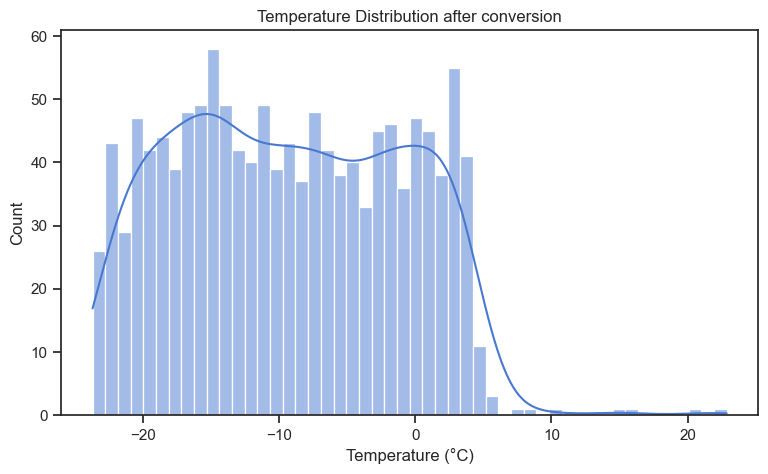

In [60]:
plt.figure(figsize=(9,5))
sns.histplot(df['Temperature (°C)'], bins=50, kde=True)
plt.title('Temperature Distribution after conversion')
plt.xlabel('Temperature (°C)')
plt.show()

## 5. Data Transformation

To prepare the dataset for Exploratory Data Analysis (EDA), several new features were engineered to enrich the analytical potential of the data.

**Geolocation features:**

The columns **`Region`**,**`Country`**, **`City Latitude`** and **`City Longitude`** were derived using custom mapping dictionaries.

**Time-based features:**

The columns **`Charging Start Time`** and **`Charging End Time`** were decomposed into separate date (yyyy-mm-dd) and time (hh:mm:ss) components. Using the **`Day of Week`** information, a new binary flag for weekend occurance was created. Additionally, the US federal holidays were identified using the holidays library.

**Charging sessions characteristics:**

To better understand user behavior and charging efficiency:

- **State of Charge Difference (%)** = SoC End – SoC Start
- **SoC Category** — grouped into Low (<30%), Medium (30–70%), High (>70%)

These transformations enabled deeper temporal, spatial, and efficiency analyses in subsequent EDA and Power BI visualizations.

In [61]:
df.head(3)

User ID Vehicle Model  Battery Capacity (kWh)  Charging Station ID  \
0        1        BMW i3              108.463007                  391   
1        2  Hyundai Kona              100.000000                  428   
2        3    Chevy Bolt               75.000000                  181   

  Charging Station Location Charging Start Time   Charging End Time  \
0                   Houston 2024-01-01 00:00:00 2024-01-01 00:39:00   
1             San Francisco 2024-01-01 01:00:00 2024-01-01 03:01:00   
2             San Francisco 2024-01-01 02:00:00 2024-01-01 04:48:00   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
0              60.712346                   0.591363           36.389181   
1              12.339275                   3.133652           30.677735   
2              19.128876                   2.452653           27.513593   

   Charging Cost (USD) Time of Day Day of Week  State of Charge (Start %)  \
0            13.087717     Evening     Tuesday                  29.371576   
1            21.128448     Morning      Monday                  10.115778   
2            35.667270     Morning    Thursday                   6.854604   

   State of Charge (End %)  Distance Driven (since last charge) (km)  \
0                86.119962                                293.602111   
1                84.664344                                112.112804   
2                69.917615                                 71.799253   

   Temperature (°C)  Vehicle Age (years)     Charger Type      User Type  \
0         -2.251137                  2.0  DC Fast Charger       Commuter   
1         -9.827208                  3.0          Level 1  Casual Driver   
2         -6.109999                  2.0          Level 2       Commuter   

   Battery Capacity with Degradation Min (kWh)  \
0                                    18.240230   
1                                    37.462328   
2                                    58.213500   

   Battery Capacity with Degradation Max (kWh)  \
0                                    40.943495   
1                                    61.927521   
2                                    63.064625   

   Updated Battery Capacity (kWh) Is Energy Valid? Is DC Fast Valid?  
0                       22.124918               No               Yes  
1                       43.741577              Yes               Yes  
2                       59.043561              Yes               Yes

In [62]:
df['Charging Station Location'].value_counts()

Los Angeles      291
San Francisco    261
Houston          259
New York         252
Chicago          236
Name: Charging Station Location, dtype: int64

In [63]:
country_map = {
    'Los Angeles' : 'United States',
    'San Francisco' : 'United States',
    'Houston' : 'United States',
    'New York' : 'United States',
    'Chicago' : 'United States'
}

region_map = {
    'Los Angeles' : 'California',
    'San Francisco' : 'California',
    'Houston' : 'Texas',
    'New York' : 'New York',
    'Chicago' : 'Illinois'
}


df['Country'] = df['Charging Station Location'].map(country_map)
df['Region'] = df['Charging Station Location'].map(region_map)

df['Country'] = df['Country'].fillna('Others')
df['Region'] = df['Region'].fillna('Unknown')

In [64]:
coord_dict = {
    'Houston': (29.7589382, -95.3676974),
     'San Francisco': (37.7792588, -122.4193286),
     'Los Angeles': (34.0536909, -118.242766),
     'Chicago': (41.8755616, -87.6244212),
     'New York': (40.7128, -74.0060)
}

df['City Latitude'] = df['Charging Station Location'].map(lambda x: coord_dict.get(x, (0, 0))[0])
df['City Longitude'] = df['Charging Station Location'].map(lambda x: coord_dict.get(x, (0, 0))[1])

In [82]:
df['Charging Date'] = df['Charging Start Time'].dt.date
df['Charging Starting Hour'] = df['Charging Start Time'].dt.strftime('%H:%M:%S')
df['Charging Ending Hour'] = df['Charging End Time'].dt.strftime('%H:%M:%S')

In [80]:
df.head()

User ID Vehicle Model  Battery Capacity (kWh)  \
0        1        BMW i3              108.463007   
1        2  Hyundai Kona              100.000000   
2        3    Chevy Bolt               75.000000   
3        4  Hyundai Kona               50.000000   
4        5  Hyundai Kona               50.000000   

   Updated Battery Capacity (kWh)  \
0                       22.124918   
1                       43.741577   
2                       59.043561   
3                       40.769317   
4                       40.769317   

   Battery Capacity with Degradation Min (kWh)  \
0                                    18.240230   
1                                    37.462328   
2                                    58.213500   
3                                    38.612000   
4                                    38.612000   

   Battery Capacity with Degradation Max (kWh)  Charging Station ID  \
0                                    40.943495                  391   
1                                    61.927521                  428   
2                                    63.064625                  181   
3                                    63.828000                  327   
4                                    63.828000                  108   

  Charging Station Location      Region        Country  City Latitude  \
0                   Houston       Texas  United States      29.758938   
1             San Francisco  California  United States      37.779259   
2             San Francisco  California  United States      37.779259   
3                   Houston       Texas  United States      29.758938   
4               Los Angeles  California  United States      34.053691   

   City Longitude Charging Start Time   Charging End Time Charging Date  \
0      -95.367697 2024-01-01 00:00:00 2024-01-01 00:39:00    2024-01-01   
1     -122.419329 2024-01-01 01:00:00 2024-01-01 03:01:00    2024-01-01   
2     -122.419329 2024-01-01 02:00:00 2024-01-01 04:48:00    2024-01-01   
3      -95.367697 2024-01-01 03:00:00 2024-01-01 06:42:00    2024-01-01   
4     -118.242766 2024-01-01 04:00:00 2024-01-01 05:46:00    2024-01-01   

  Charging Starting Hour Charging Ending Hour  Charging Duration (hours)  \
0               00:00:00             00:39:00                   0.591363   
1               01:00:00             03:01:00                   3.133652   
2               02:00:00             04:48:00                   2.452653   
3               03:00:00             06:42:00                   1.266431   
4               04:00:00             05:46:00                   2.019765   

  Time of Day Day of Week Weekend Holiday  Energy Consumed (kWh)  \
0     Evening     Tuesday      No     Yes              60.712346   
1     Morning      Monday      No     Yes              12.339275   
2     Morning    Thursday      No     Yes              19.128876   
3     Evening    Saturday     Yes     Yes              79.457824   
4     Morning    Saturday     Yes     Yes              19.629104   

   Charging Rate (kW)  State of Charge (Start %)  State of Charge (End %)  \
0           36.389181                  29.371576                86.119962   
1           30.677735                  10.115778                84.664344   
2           27.513593                   6.854604                69.917615   
3           32.882870                  83.120003                99.624328   
4           10.215712                  54.258950                63.743786   

   State of Charge Difference (%) State of Charge Category  \
0                       56.748386                   Medium   
1                       74.548566                     High   
2                       63.063011                   Medium   
3                       16.504325                      Low   
4                        9.484836                      Low   

   Distance Driven (since last charge) (km)  Temperature (°C)  \
0                                293.602111         -2.251137   
1                

In [67]:
df['Weekend'] = np.where(df['Day of Week'].isin(['Saturday', 'Sunday']), 'Yes', 'No')

us_holidays = holidays.US(years=df['Charging Date'].apply(lambda x: x.year).unique())
df['Holiday'] = df['Charging Date'].apply(lambda x: x in us_holidays).map({True : 'Yes', False : 'No'})

In [68]:
df['State of Charge Difference (%)'] = df['State of Charge (End %)'] - df['State of Charge (Start %)']

In [69]:
soc_bins = [0, 30, 70, 100]
soc_labels = ['Low', 'Medium', 'High']

df['State of Charge Category'] = pd.cut(df['State of Charge Difference (%)'], bins = soc_bins, labels = soc_labels, right = False)

In [70]:
df.tail(1)

User ID Vehicle Model  Battery Capacity (kWh)  Charging Station ID  \
1319     1320   Nissan Leaf              120.447195                  128   

     Charging Station Location Charging Start Time   Charging End Time  \
1319               Los Angeles 2024-02-24 23:00:00 2024-02-24 23:56:00   

      Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
1319               63.65257                    3.74097           33.704226   

      Charging Cost (USD) Time of Day Day of Week  State of Charge (Start %)  \
1319            10.863674     Evening      Monday                  56.692439   

      State of Charge (End %)  Distance Driven (since last charge) (km)  \
1319                59.338076                                 14.449236   

      Temperature (°C)  Vehicle Age (years)     Charger Type User Type  \
1319        -21.648107                  5.0  DC Fast Charger  Commuter   

      Battery Capacity with Degradation Min (kWh)  \
1319                                    22.253196   

      Battery Capacity with Degradation Max (kWh)  \
1319                                    57.487423   

      Updated Battery Capacity (kWh) Is Energy Valid? Is DC Fast Valid?  \
1319                       37.325253               No                No   

            Country      Region  City Latitude  City Longitude Charging Date  \
1319  United States  California      34.053691     -118.242766    2024-02-24   

     Charging Starting Hour Charging Ending Hour Weekend Holiday  \
1319               23:00:00             23:56:00      No      No   

      State of Charge Difference (%) State of Charge Category  
1319                        2.645636                      Low

In [71]:
df = df[['User ID', 'Vehicle Model', 'Battery Capacity (kWh)', 'Updated Battery Capacity (kWh)', 'Battery Capacity with Degradation Min (kWh)',
       'Battery Capacity with Degradation Max (kWh)', 'Charging Station ID', 'Charging Station Location', 'Region','Country', 'City Latitude',
       'City Longitude', 'Charging Start Time', 'Charging End Time', 'Charging Date', 'Charging Starting Hour', 'Charging Ending Hour', 'Charging Duration (hours)', 'Time of Day', 
        'Day of Week', 'Weekend', 'Holiday', 'Energy Consumed (kWh)', 'Charging Rate (kW)', 'State of Charge (Start %)', 'State of Charge (End %)',
        'State of Charge Difference (%)', 'State of Charge Category', 'Distance Driven (since last charge) (km)', 'Temperature (°C)',
        'Charging Cost (USD)', 'Vehicle Age (years)', 'Charger Type', 'User Type', 
        'Is Energy Valid?', 'Is DC Fast Valid?']]

df.head(3)       

User ID Vehicle Model  Battery Capacity (kWh)  \
0        1        BMW i3              108.463007   
1        2  Hyundai Kona              100.000000   
2        3    Chevy Bolt               75.000000   

   Updated Battery Capacity (kWh)  \
0                       22.124918   
1                       43.741577   
2                       59.043561   

   Battery Capacity with Degradation Min (kWh)  \
0                                    18.240230   
1                                    37.462328   
2                                    58.213500   

   Battery Capacity with Degradation Max (kWh)  Charging Station ID  \
0                                    40.943495                  391   
1                                    61.927521                  428   
2                                    63.064625                  181   

  Charging Station Location      Region        Country  City Latitude  \
0                   Houston       Texas  United States      29.758938   
1             San Francisco  California  United States      37.779259   
2             San Francisco  California  United States      37.779259   

   City Longitude Charging Start Time   Charging End Time Charging Date  \
0      -95.367697 2024-01-01 00:00:00 2024-01-01 00:39:00    2024-01-01   
1     -122.419329 2024-01-01 01:00:00 2024-01-01 03:01:00    2024-01-01   
2     -122.419329 2024-01-01 02:00:00 2024-01-01 04:48:00    2024-01-01   

  Charging Starting Hour Charging Ending Hour  Charging Duration (hours)  \
0               00:00:00             00:39:00                   0.591363   
1               01:00:00             03:01:00                   3.133652   
2               02:00:00             04:48:00                   2.452653   

  Time of Day Day of Week Weekend Holiday  Energy Consumed (kWh)  \
0     Evening     Tuesday      No     Yes              60.712346   
1     Morning      Monday      No     Yes              12.339275   
2     Morning    Thursday      No     Yes              19.128876   

   Charging Rate (kW)  State of Charge (Start %)  State of Charge (End %)  \
0           36.389181                  29.371576                86.119962   
1           30.677735                  10.115778                84.664344   
2           27.513593                   6.854604                69.917615   

   State of Charge Difference (%) State of Charge Category  \
0                       56.748386                   Medium   
1                       74.548566                     High   
2                       63.063011                   Medium   

   Distance Driven (since last charge) (km)  Temperature (°C)  \
0                                293.602111         -2.251137   
1                                112.112804         -9.827208   
2                                 71.799253         -6.109999   

   Charging Cost (USD)  Vehicle Age (years)     Charger Type      User Type  \
0            13.087717                  2.0  DC Fast Charger       Commuter   
1            21.128448                  3.0          Level 1  Casual Driver   
2            35.667270                  2.0          Level 2       Commuter   

  Is Energy Valid? Is DC Fast Valid?  
0               No               Yes  
1              Yes               Yes  
2              Yes               Yes

## 6. Exploratory Data Analysis (EDA)

Kiedy (czasowo) ludzie ładują pojazdy?

Jak długo trwa ładowanie?

Ile energii zużywają i jak efektywnie?

Czy lokalizacja lub dzień tygodnia ma znaczenie?

Jak SoC wpływa na zużycie energii?

In [72]:
usertype_df = (
    df.groupby(['Country', 'Region', 'Charging Station Location', 'User Type']).size().reset_index(name = 'count')
)

fig_userstype = px.sunburst(usertype_df, path =['Country', 'Region', 'Charging Station Location', 'User Type'], values = 'count', 
                            color = 'User Type',
                           title = 'Distribution of User Types by Location',
                           color_discrete_sequence = qualitative.Set2)
fig_userstype.update_layout(width = 800, height = 500)

fig_userstype.show()

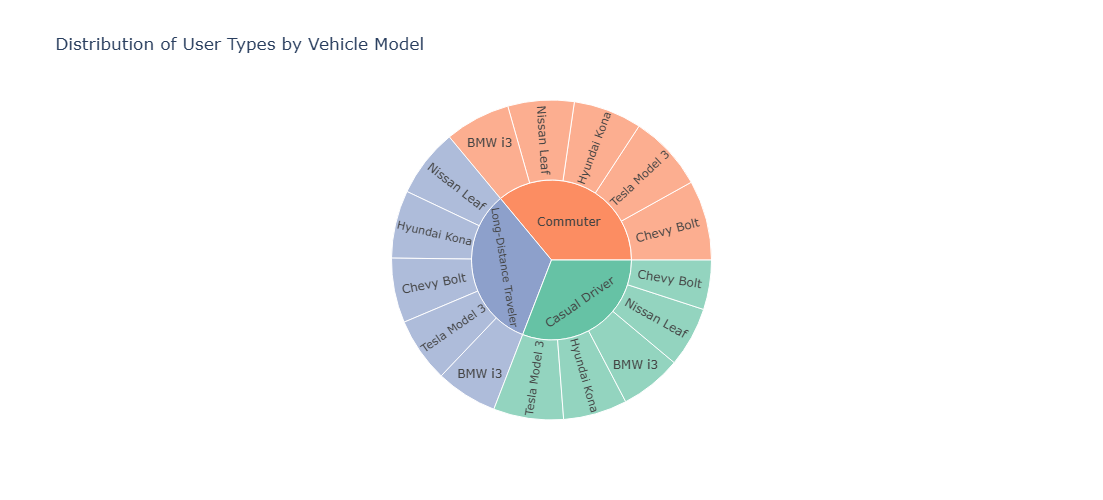

In [99]:
cartype_df = (
    df.groupby(['User Type', 'Vehicle Model']).size().reset_index(name = 'count')
)

fig_cartype = px.sunburst(cartype_df, path =['User Type', 'Vehicle Model'], values = 'count', 
                            color = 'User Type',
                           title = 'Distribution of User Types by Vehicle Model',
                           color_discrete_sequence = qualitative.Set2)
fig_cartype.update_layout(width = 800, height = 500)

fig_cartype.show()

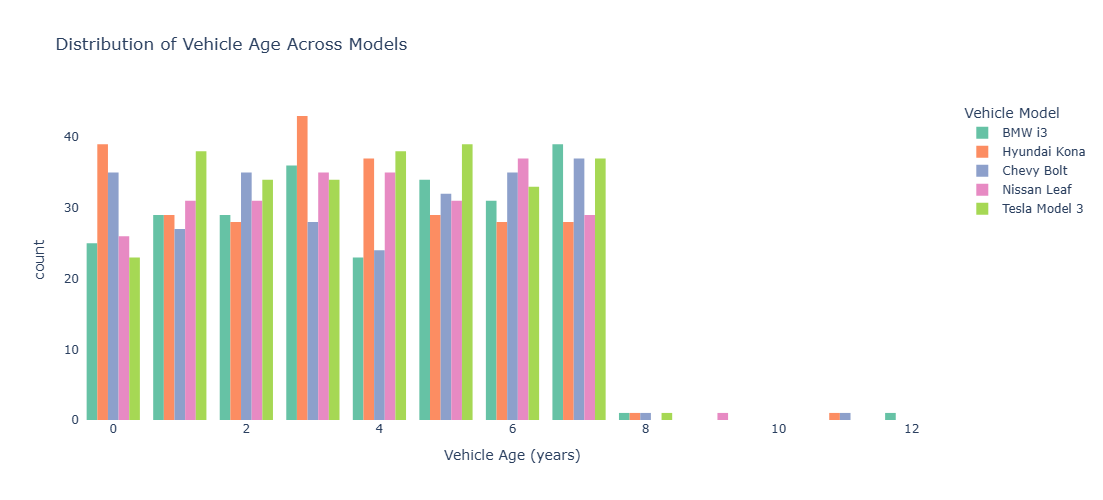

In [110]:
fig_car_age = px.histogram(df, x = 'Vehicle Age (years)', 
                            title ='Distribution of Vehicle Age Across Models', 
                            color = 'Vehicle Model', 
                           nbins =15,
                           barmode='group',
                          color_discrete_sequence = qualitative.Set2)
fig_car_age .update_layout(
                        plot_bgcolor = 'white', width = 800, height = 500)

fig_car_age.show()

In [73]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig_weekdays = px.histogram(df, x = 'Day of Week', 
                            title ='Charging Sessions Count per Day of Week', 
                            color = 'User Type', 
                           category_orders = {'Day of Week': days_order},
                           color_discrete_sequence = qualitative.Set2)
fig_weekdays.update_layout(
                        plot_bgcolor = 'white', width = 800, height = 500)

fig_weekdays.show()

In [74]:
timedays_order = ['Morning', 'Afternoon', 'Evening', 'Night']

fig_daytime = px.histogram(df, x = 'Time of Day', 
                            title ='Charging Sessions Count per Time of Day', 
                            color = 'User Type', 
                           category_orders = {'Time of Day': timedays_order},
                          color_discrete_sequence = qualitative.Set2)
fig_daytime.update_layout(
                        plot_bgcolor = 'white', width = 800, height = 500)

fig_daytime.show()

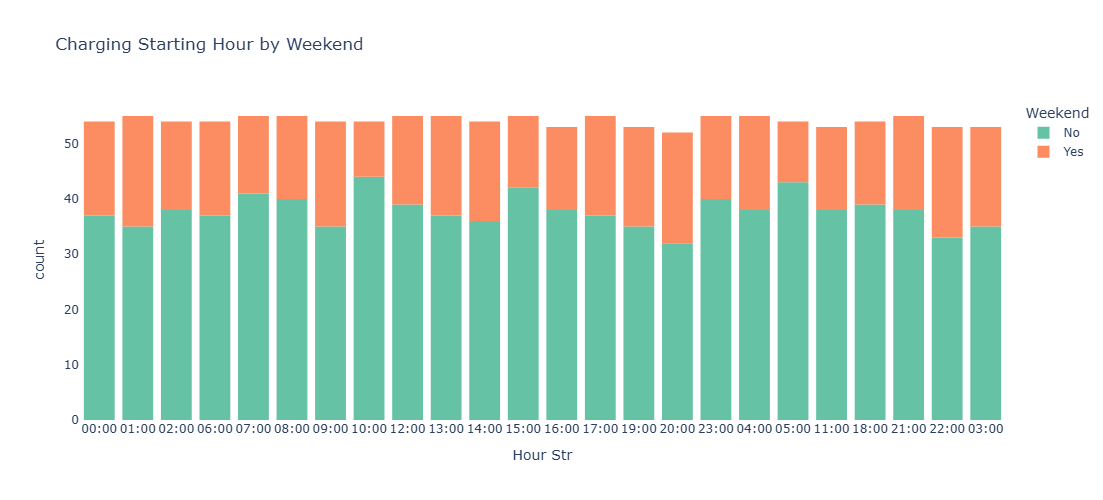

In [111]:
df['Hour Str'] = df['Charging Start Time'].dt.strftime('%H:00')
df['Hour Str'] = pd.Categorical(df['Hour Str'],
                                              categories = [f"{h:02d}:00" for h in range(24)], 
                                              ordered = True)

fig_charginghour_start_weekend = px.histogram(df, x = 'Hour Str', 
                            title ='Charging Starting Hour by Weekend', 
                            color = 'Weekend', 
                           nbins =24,
                          color_discrete_sequence = qualitative.Set2)
fig_charginghour_start_weekend .update_layout(
                        plot_bgcolor = 'white', width = 800, height = 500)

fig_charginghour_start_weekend.show()

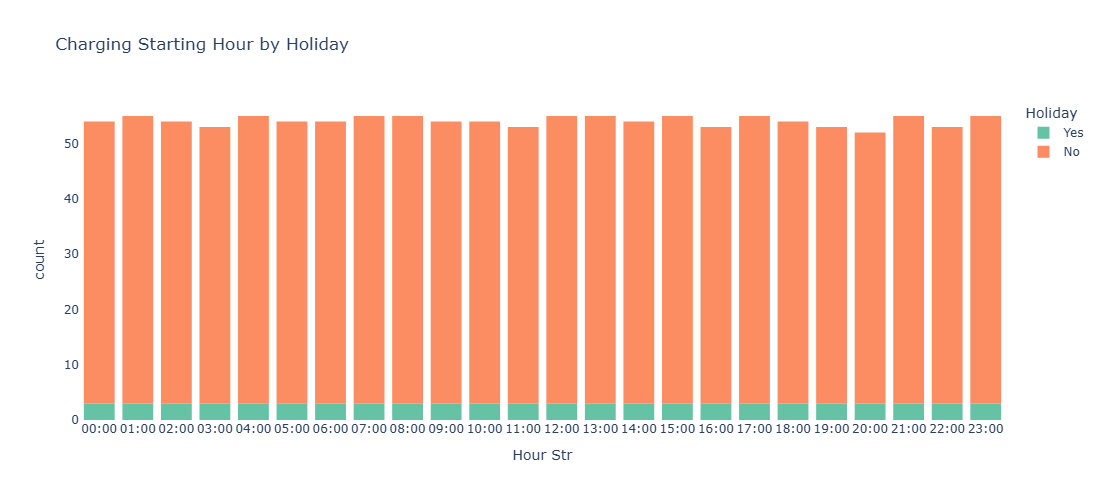

In [90]:
fig_charginghour_start_holiday = px.histogram(df, x = 'Hour Str', 
                            title ='Charging Starting Hour by Holiday', 
                            color = 'Holiday', 
                           nbins = 24,
                          color_discrete_sequence = qualitative.Set2)
fig_charginghour_start_holiday.update_layout(
                        plot_bgcolor = 'white', width = 800, height = 500)

fig_charginghour_start_holiday.show()

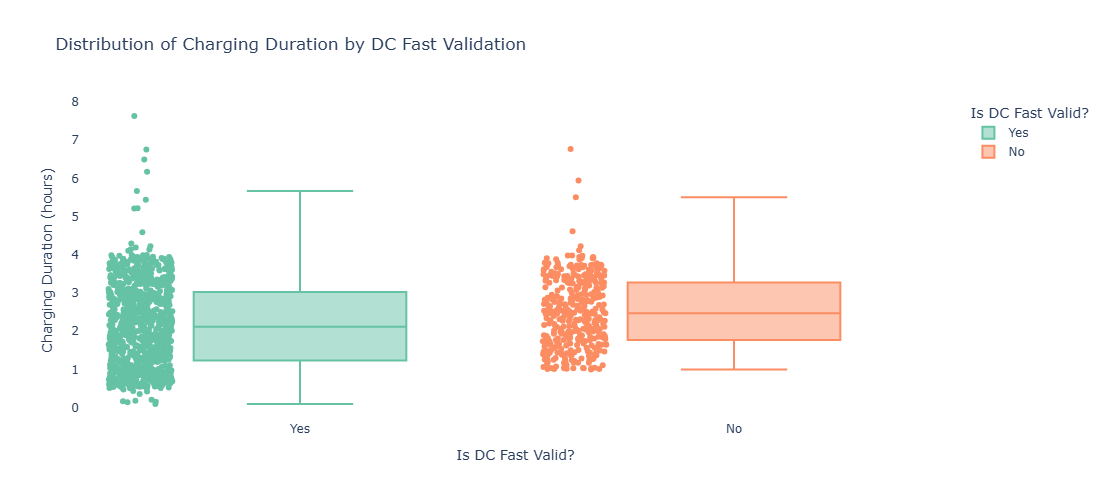

In [76]:
fig_avg_chargingtime = px.box(df, x ='Is DC Fast Valid?', y ='Charging Duration (hours)', color ='Is DC Fast Valid?',
                            title ='Distribution of Charging Duration by DC Fast Validation',
                            points ='all',
                            color_discrete_sequence = qualitative.Set2)

fig_avg_chargingtime.update_layout(
                        plot_bgcolor ='white', width = 800, height = 500)

fig_avg_chargingtime.show()

In [77]:
px.scatter(df, x='State of Charge (Start %)', y='State of Charge (End %)', color='State of Charge Category')

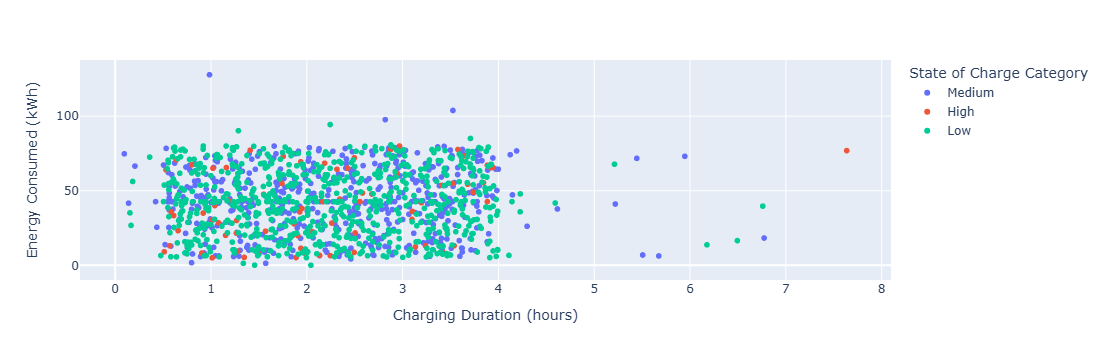

In [78]:
px.scatter(df, x='Charging Duration (hours)', y='Energy Consumed (kWh)', color='State of Charge Category')

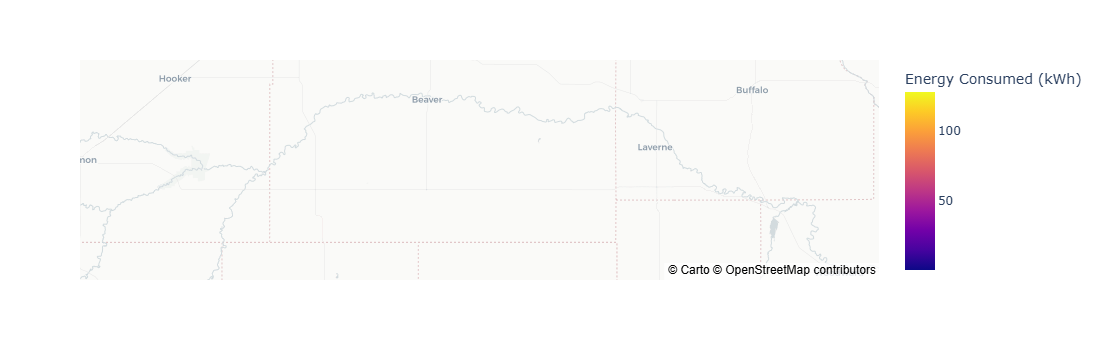

In [79]:
px.scatter_mapbox(df, lat='City Latitude', lon='City Longitude', color='Energy Consumed (kWh)', size='Charging Duration (hours)', mapbox_style='carto-positron')

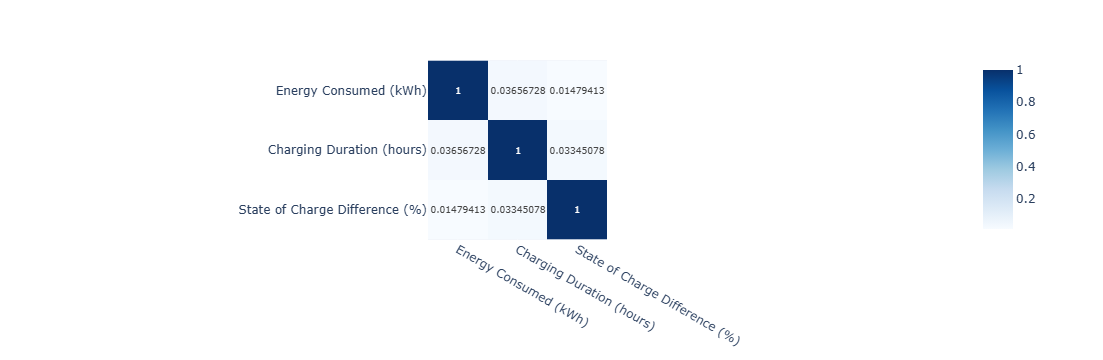

In [80]:
corr = df[['Energy Consumed (kWh)', 'Charging Duration (hours)', 
           'State of Charge Difference (%)']].corr()
fig = px.imshow(corr, text_auto=True, color_continuous_scale='Blues')
fig.show()

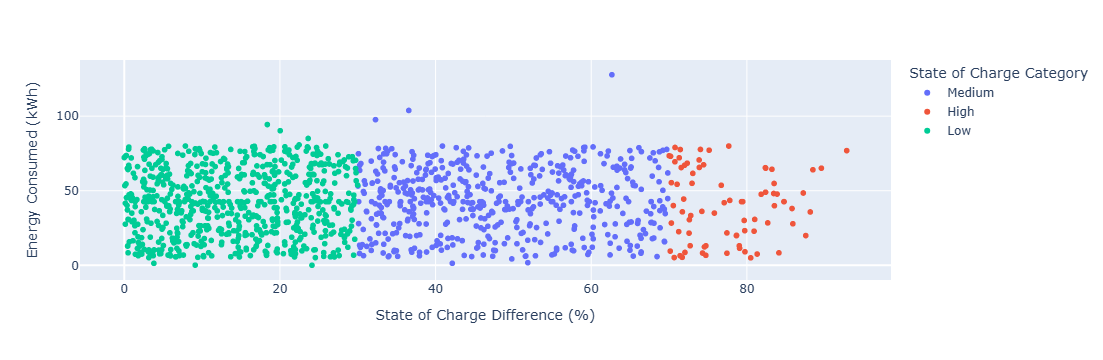

In [82]:
px.scatter(df, x='State of Charge Difference (%)', y='Energy Consumed (kWh)', color='State of Charge Category')

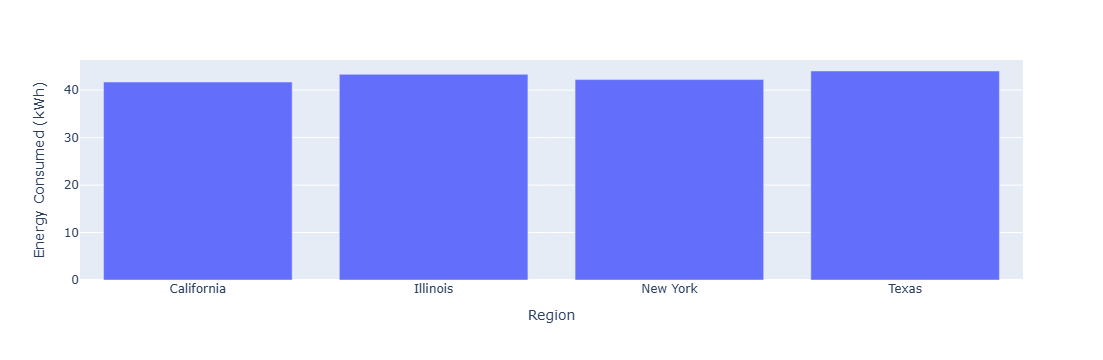

In [83]:
px.bar(df.groupby('Region', as_index=False).mean(), x='Region', y='Energy Consumed (kWh)')

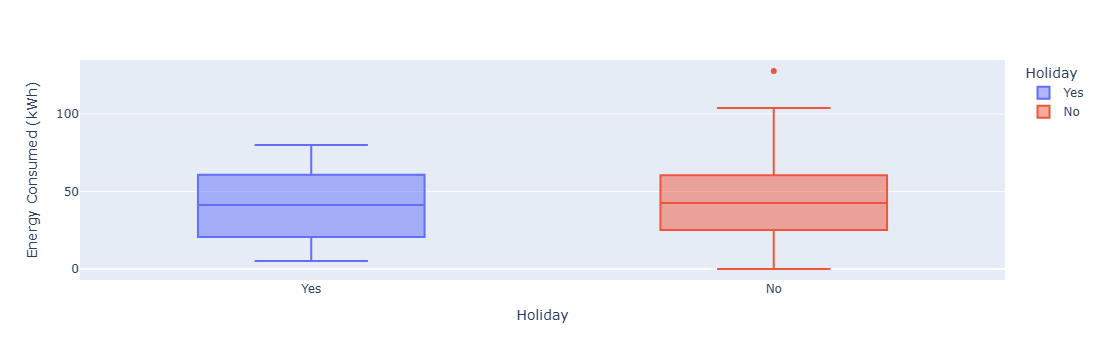

In [84]:
px.box(df, x='Holiday', y='Energy Consumed (kWh)', color='Holiday')

## 7. Key Findings / Insights

## 8. Conclusion & Next Steps